# Imports

In [3]:
# Info:
# Zusammengestellt aus den Notebooks von Joachim Wirth und eigenen Übungen
import numpy as np
import matplotlib.pyplot as pl

# Matrix erstellen

In [2]:
Matrix = np.array([
    [1, 1, 2],
    [3, 1, 1],
    [3, 2, 4]
])

# Inverse

In [3]:
np.linalg.inv(Matrix)

array([[-2.00000000e+00,  2.22044605e-16,  1.00000000e+00],
       [ 9.00000000e+00,  2.00000000e+00, -5.00000000e+00],
       [-3.00000000e+00, -1.00000000e+00,  2.00000000e+00]])

# Determinante

In [4]:
np.linalg.det(Matrix)

-1.0000000000000004

# Rang einer Matrix

In [5]:
# https://mxncalc.com/de/rank
np.linalg.matrix_rank(Matrix)

3

# Einheitsmatrix

In [30]:
n = Matrix.shape [0]
I = np.eye (n)
print(I)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


# LU Zerlegung

In [7]:
# https://mxncalc.com/de/lu-factorization

def LU (A):
    n = A.shape [0]
    L = np.eye (n)
    U = np.copy (A)
    
    for i in range (n - 1):
        L [i + 1 : n, i] = U [i + 1 : n, i] / U [i, i]
        for k in range (i + 1, n):
            U [k, i : n] = U [k, i : n] - (L [k, i] * U [i, i : n])
                                           
    return (L, U)

# Gauss

In [8]:
# https://matrixcalc.org/de/slu.html 


def Gauss (A0, b0):
    n = A0.shape [0]
    A = np.copy (A0)
    b = np.copy (b0)
    for i in range (n - 1):
        k = i + 1 + np.argmax (abs (A [i + 1 : n, i]))
        tmp = np.copy (A [i]); A [i] = A [k]; A [k] = tmp
        tmp = np.copy (b [i]); b [i] = b [k]; b [k] = tmp
        for k in range (i + 1, n):
            s = A [k, i] / A [i, i]
            A [k] = A [k] - s * A [i]
            b [k] = b [k] - s * b [i]
    x = np.zeros ((n, 1))
    for i in range (n - 1, -1, -1):
        s = b [i]
        for k in range (i + 1, n):
            s = s - A [i, k] * x [k]
        x [i] = s / A [i, i]
    return x

def gauss (A):
    m, n = A.shape # m: anzahl der Zeilen + n: Anzahl der Spalten
    for i in range (m - 1): # Diagonalelement A [i, i]
        for j in range(i + 1, n): # Alle Elemente unterhalb von A [i, i]
            f = A[j, i] / A[i, i] # Faktor zu Multiplikation der oberen Zeile
            A[j, :] -= f * A[i, :] # Vielfaches der i-ten Zeile von der j-ten subtrahieren

# Eigenwerte & Vektoren

In [7]:
#https://matrixcalc.org/de/vectors.html

Matrix = np.array([
    [3, 7],
    [7, 2],
])

eigenwert, eigenvektor = np.linalg.eig(Matrix)
print(eigenwert)
print(eigenvektor)

[ 9.51783442 -4.51783442]
[[ 0.73186305 -0.68145174]
 [ 0.68145174  0.73186305]]


# SVD | Zerlegung von beliebigen Matrizen

In [9]:
U, D, V = np.linalg.svd (Matrix)
Sigma = np.diag (D)
print('U')
print(U)
print('D')
print(D)
print('V')
print(V)

U
[[-0.73186305 -0.68145174]
 [-0.68145174  0.73186305]]
D
[9.51783442 4.51783442]
V
[[-0.73186305 -0.68145174]
 [ 0.68145174 -0.73186305]]


# Transformation

(-0.16830127018922192,
 3.53432667397366,
 -0.2616025403784439,
 5.493653347947322)

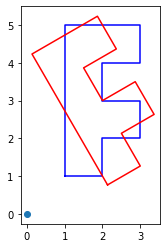

In [11]:
def Rot (phi):
    t = phi * np.pi / 180
    c = np.cos (t)
    s = np.sin (t)
    return np.array ([
        [c, -s, 0],
        [s,  c, 0],
        [0,  0, 1]
    ])

def Trans (u, v):
    return np.array ([
        [1, 0, u],
        [0, 1, v],
        [0, 0, 1]
    ])

p = np.array ([
    [1, 2, 2, 3, 3, 2, 2, 3, 3, 1, 1],
    [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
])

R = Rot (30)
T = Trans (2, 3)
M = T @ R @ np.linalg.inv (T)

q = M @ p
pl.plot ([0], [0], 'o')
pl.plot (p [0, :], p [1, :], 'blue')
pl.plot (q [0, :], q [1, :], 'red')
pl.axis ('scaled')

# Matrix Zentrieren

In [15]:
Matrix = np.array([
    [1, 1],
    [3, 2],
    [4, 4],
    [6, 7],
])

m, n = Matrix.shape
M = np.eye (m) - np.ones ((m, m)) / m
X = M @ Matrix
print(X)

[[-2.5 -2.5]
 [-0.5 -1.5]
 [ 0.5  0.5]
 [ 2.5  3.5]]


# Kovarianzmatrix

In [16]:
C  = X.T @ X / (m - 1)
print(C)

[[4.33333333 5.33333333]
 [5.33333333 7.        ]]


# Hauptkomponentenanalyse | SVD / PCA

In [29]:
U, Sigma, VT = np.linalg.svd (C)
print('U')
print(U)
print('Sigma')
print(Sigma)
print('VT')
print(VT)

U
[[-0.61541221 -0.78820544]
 [-0.78820544  0.61541221]]
Sigma
[11.16414083  0.1691925 ]
VT
[[-0.61541221 -0.78820544]
 [-0.78820544  0.61541221]]
[[4.33333333 5.33333333]
 [5.33333333 7.        ]]


# Runden

In [15]:
np.round (Matrix, 4)

array([[1, 1, 2],
       [3, 1, 1],
       [3, 2, 4]])

# Regressionskoeffizienten

In [3]:
# Datenpunkte sind (0,1), (1,1), (2,3)
# X = erste Spalte 1er
# X = 2. Spalte 1. Punkt von den Datensätzen
# y = 2. punkt von den Datensätzen

X = np.array([
    [1, 0],
    [1, 1],
    [1, 2]
])

y = np.array([
    [1],
    [1],
    [3]
])

b = (np.linalg.inv(X.T @ X) @ X.T @ y)
print(b)

[[0.66666667]
 [1.        ]]


# Projektionsmatrix / Prädiktionsmatrix

In [17]:
P = X @ np.linalg.inv(X.T @ X) @ X.T
print(P)

[[ 0.83333333  0.33333333 -0.16666667]
 [ 0.33333333  0.33333333  0.33333333]
 [-0.16666667  0.33333333  0.83333333]]


# Residualmatrix

In [18]:
n = X.shape [0]
I = np.eye (n) # Einheitsmatrix

Q = I - P
print(Q)

[[ 0.16666667 -0.33333333  0.16666667]
 [-0.33333333  0.66666667 -0.33333333]
 [ 0.16666667 -0.33333333  0.16666667]]


# Regressionshyperebene | ˆy

In [19]:
yDach = P @ y
print(yDach)

[[0.66666667]
 [1.66666667]
 [2.66666667]]


# Fehlervektor

In [20]:
e = y - yDach
print('y - yDach\n', e)
#oder

e = Q @ y
print('Q * y\n', e)

y - yDach
 [[ 0.33333333]
 [-0.66666667]
 [ 0.33333333]]
Q * y
 [[ 0.33333333]
 [-0.66666667]
 [ 0.33333333]]


# SQR

In [21]:
sqr = e.T @ e
print(sqr)

[[0.66666667]]


# SQT

In [15]:
# Matrix zentrieren
m = X.shape [0]
M = np.eye (m) - np.ones ((m, m)) / m

sqt = y.T @ M @ y
print(sqt)

[[2.66666667]]


# Bestimmheitsmass

In [22]:
R2 = 1 - sqr / sqt
print(R2)

[[0.75]]
